# Unsupervised Learning: Trade&Ahead

**Marks: 60**

## Importing necessary libraries and data

In [1]:
#please uncomment and run the next line if yellowbrick library is not previously installed
!pip install yellowbrick
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans

# to normalize or scale the data using z-score
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# load class for spectral clustering
from sklearn.cluster import SpectralClustering

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA


In [2]:
# load the dataset
data = pd.read_csv("stock_data.csv")
# make a working copy of the data
tah_df = data.copy()

In [3]:
data.shape

(340, 15)

In [4]:
# view random sample of the dataset
data.sample(n=10, random_state=1)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.55,4.065823e+08,93.089287,1.785616
125,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.52,1.636250e+08,26.335526,-1.269332
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.28,4.913916e+08,24.070121,-2.256747
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.23,7.652981e+08,93.089287,3.345102
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130001,-21.253771,2.364883,2,201,523803000,85171000,0.56,1.520911e+08,93.089287,9.567952
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.79,8.493671e+08,93.089287,17.345857
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.619999,3.653584,1.159897,20,99,2288000000,2297000000,5.14,4.468872e+08,10.431906,-0.375934
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480000,7.067477,1.580839,12,67,412000000,968100000,2.26,4.283628e+08,14.814159,4.218620


## Data Overview

- Observations
- Sanity checks

In [5]:
# extract the numeric data into a different variable
tah_df = data.loc[:,"Current Price":"P/B Ratio"]

In [6]:
tah_df.head()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

### There are no missing values in the data

In [8]:
tah_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Current Price                 340 non-null    float64
 1   Price Change                  340 non-null    float64
 2   Volatility                    340 non-null    float64
 3   ROE                           340 non-null    int64  
 4   Cash Ratio                    340 non-null    int64  
 5   Net Cash Flow                 340 non-null    int64  
 6   Net Income                    340 non-null    int64  
 7   Earnings Per Share            340 non-null    float64
 8   Estimated Shares Outstanding  340 non-null    float64
 9   P/E Ratio                     340 non-null    float64
 10  P/B Ratio                     340 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 29.3 KB


In [9]:
tah_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Price,340.0,8.086234e+01,9.805509e+01,4.500000e+00,3.855500e+01,5.970500e+01,9.288000e+01,1.274950e+03
Price Change,340.0,4.078194e+00,1.200634e+01,-4.712969e+01,-9.394838e-01,4.819505e+00,1.069549e+01,5.505168e+01
Volatility,340.0,1.525976e+00,5.917984e-01,7.331632e-01,1.134878e+00,1.385593e+00,1.695549e+00,4.580042e+00
ROE,340.0,3.959706e+01,9.654754e+01,1.000000e+00,9.750000e+00,1.500000e+01,2.700000e+01,9.170000e+02
Cash Ratio,340.0,7.002353e+01,9.042133e+01,0.000000e+00,1.800000e+01,4.700000e+01,9.900000e+01,9.580000e+02
Net Cash Flow,340.0,5.553762e+07,1.946365e+09,-1.120800e+10,-1.939065e+08,2.098000e+06,1.698108e+08,2.076400e+10
Net Income,340.0,1.494385e+09,3.940150e+09,-2.352800e+10,3.523012e+08,7.073360e+08,1.899000e+09,2.444200e+10
Earnings Per Share,340.0,2.776662e+00,6.587779e+00,-6.120000e+01,1.557500e+00,2.895000e+00,4.620000e+00,5.009000e+01
Estimated Shares Outstanding,340.0,5.770283e+08,8.458496e+08,2.767216e+07,1.588482e+08,3.096751e+08,5.731175e+08,6.159292e+09
P/E Ratio,340.0,3.261256e+01,4.434873e+01,2.935451e+00,1.504465e+01,2.081988e+01,3.176476e+01,5.280391e+02


## Exploratory Data Analysis (EDA)

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

## Univariate Analysis

In [10]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

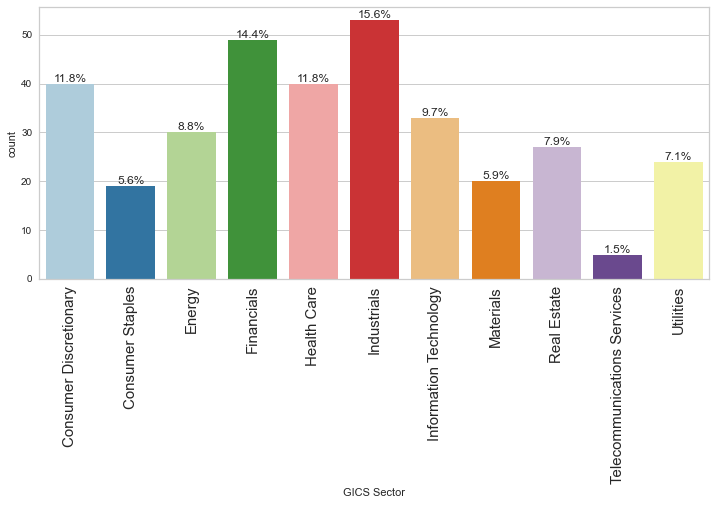

In [11]:
labeled_barplot(data, "GICS Sector", perc=True)

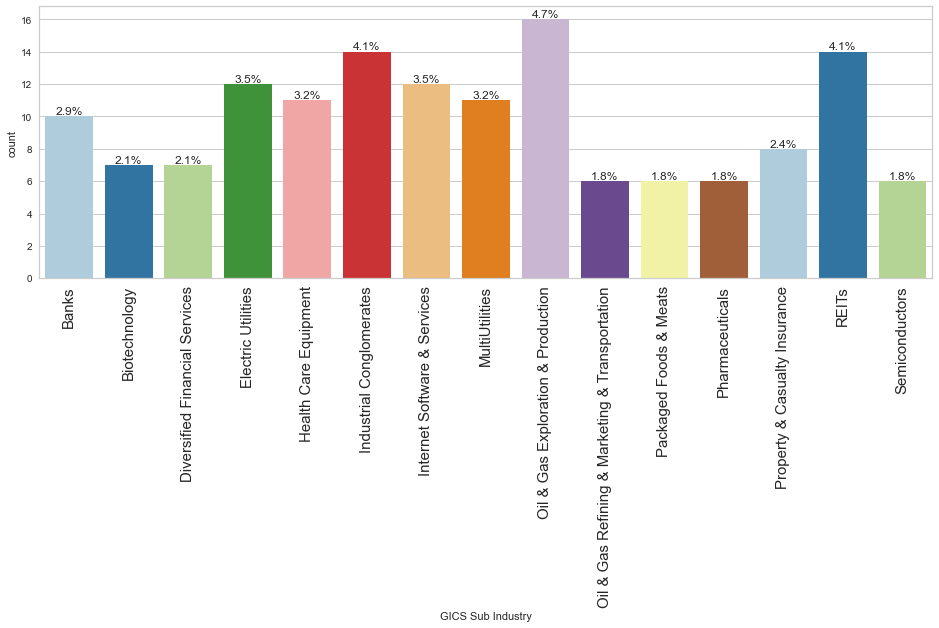

In [12]:
labeled_barplot(data, "GICS Sub Industry", perc=True, n=15)

In [13]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

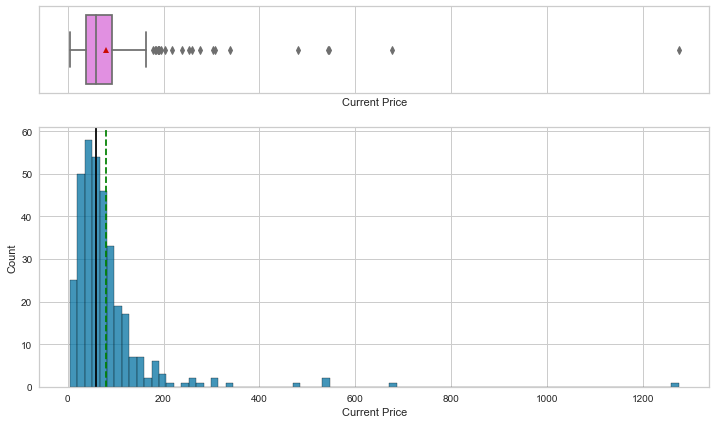

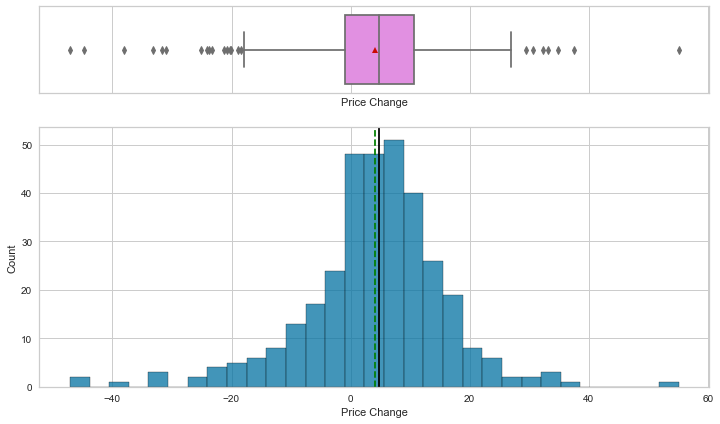

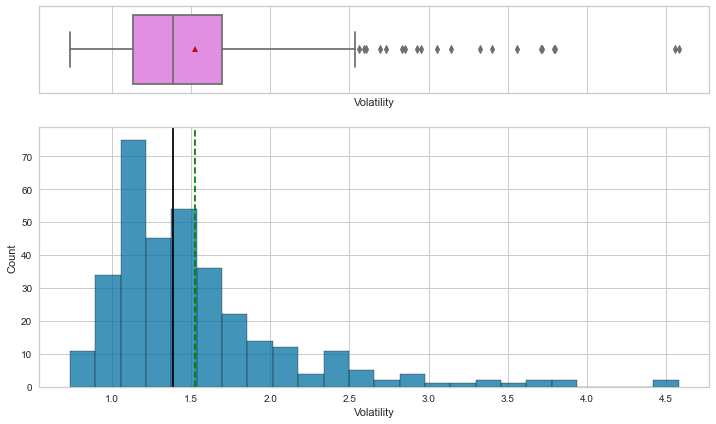

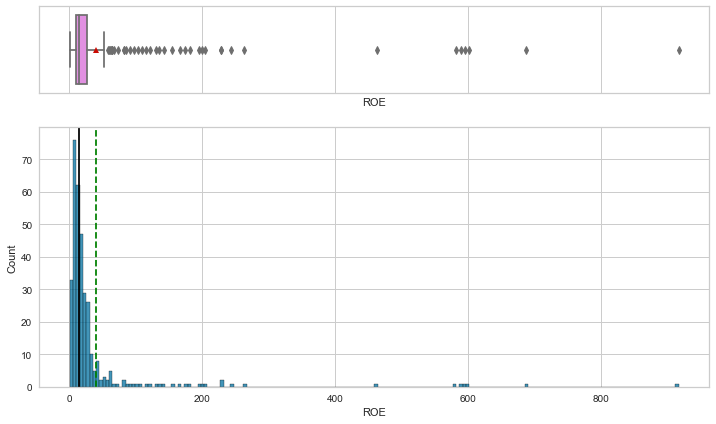

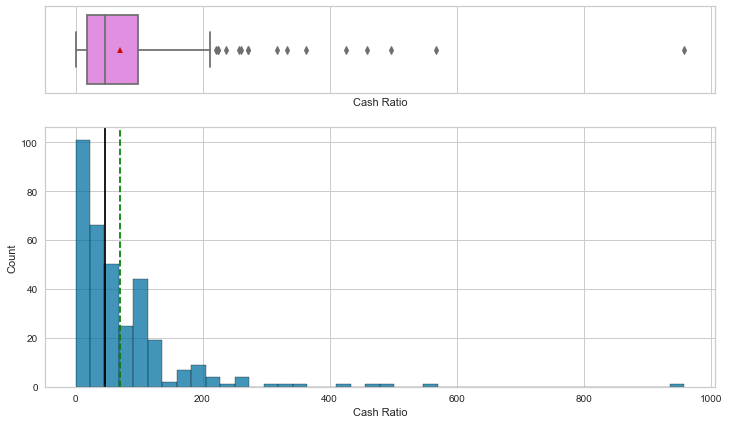

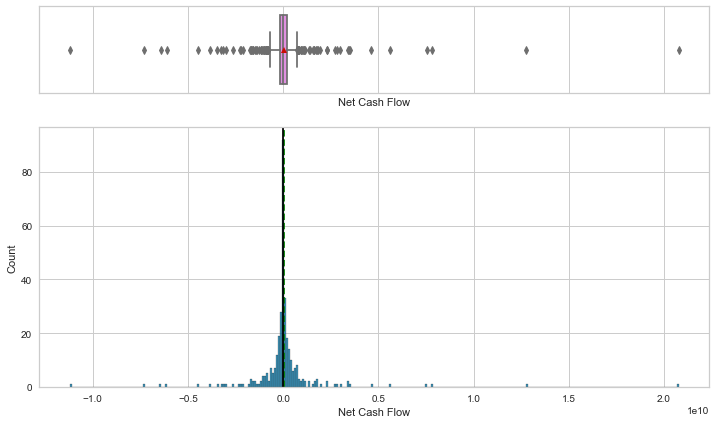

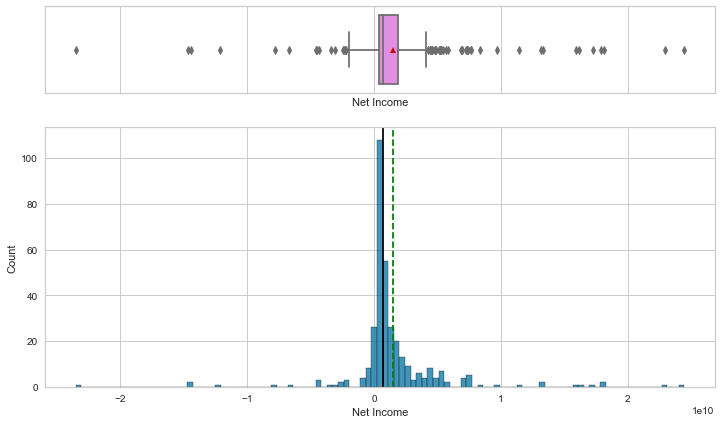

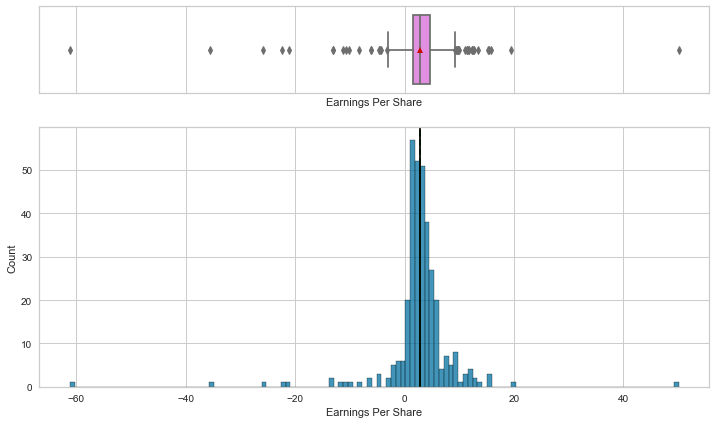

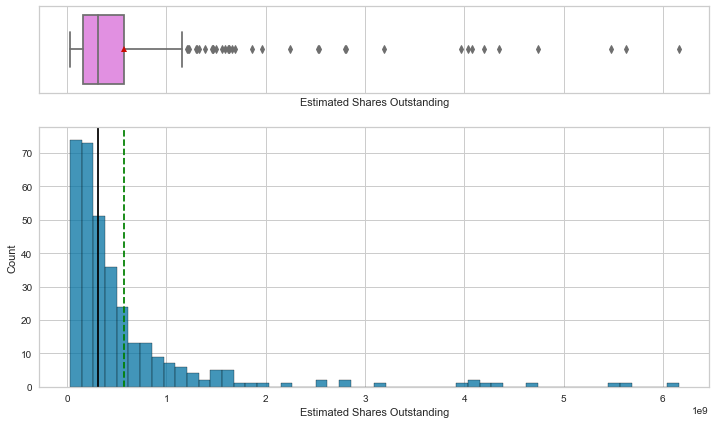

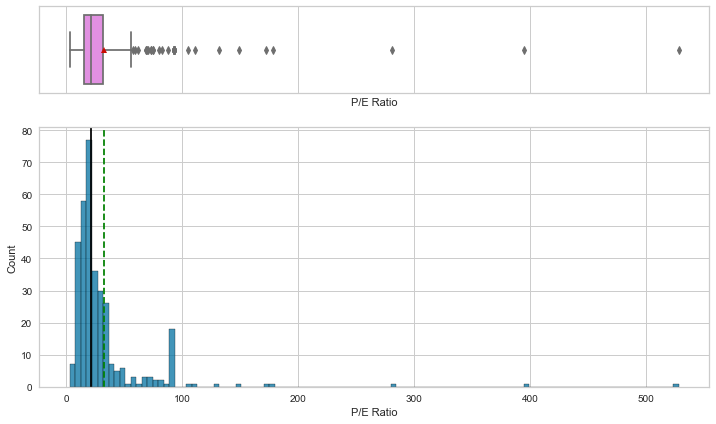

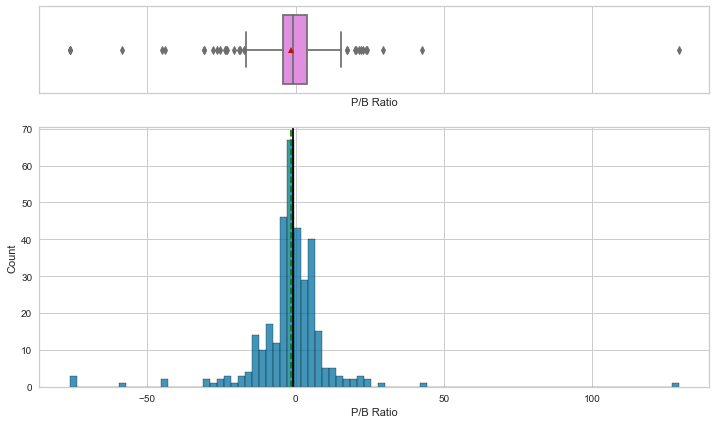

In [14]:
for feature in tah_df.columns:
    histogram_boxplot(tah_df, feature, figsize=(12, 7), kde=False, bins=None)    

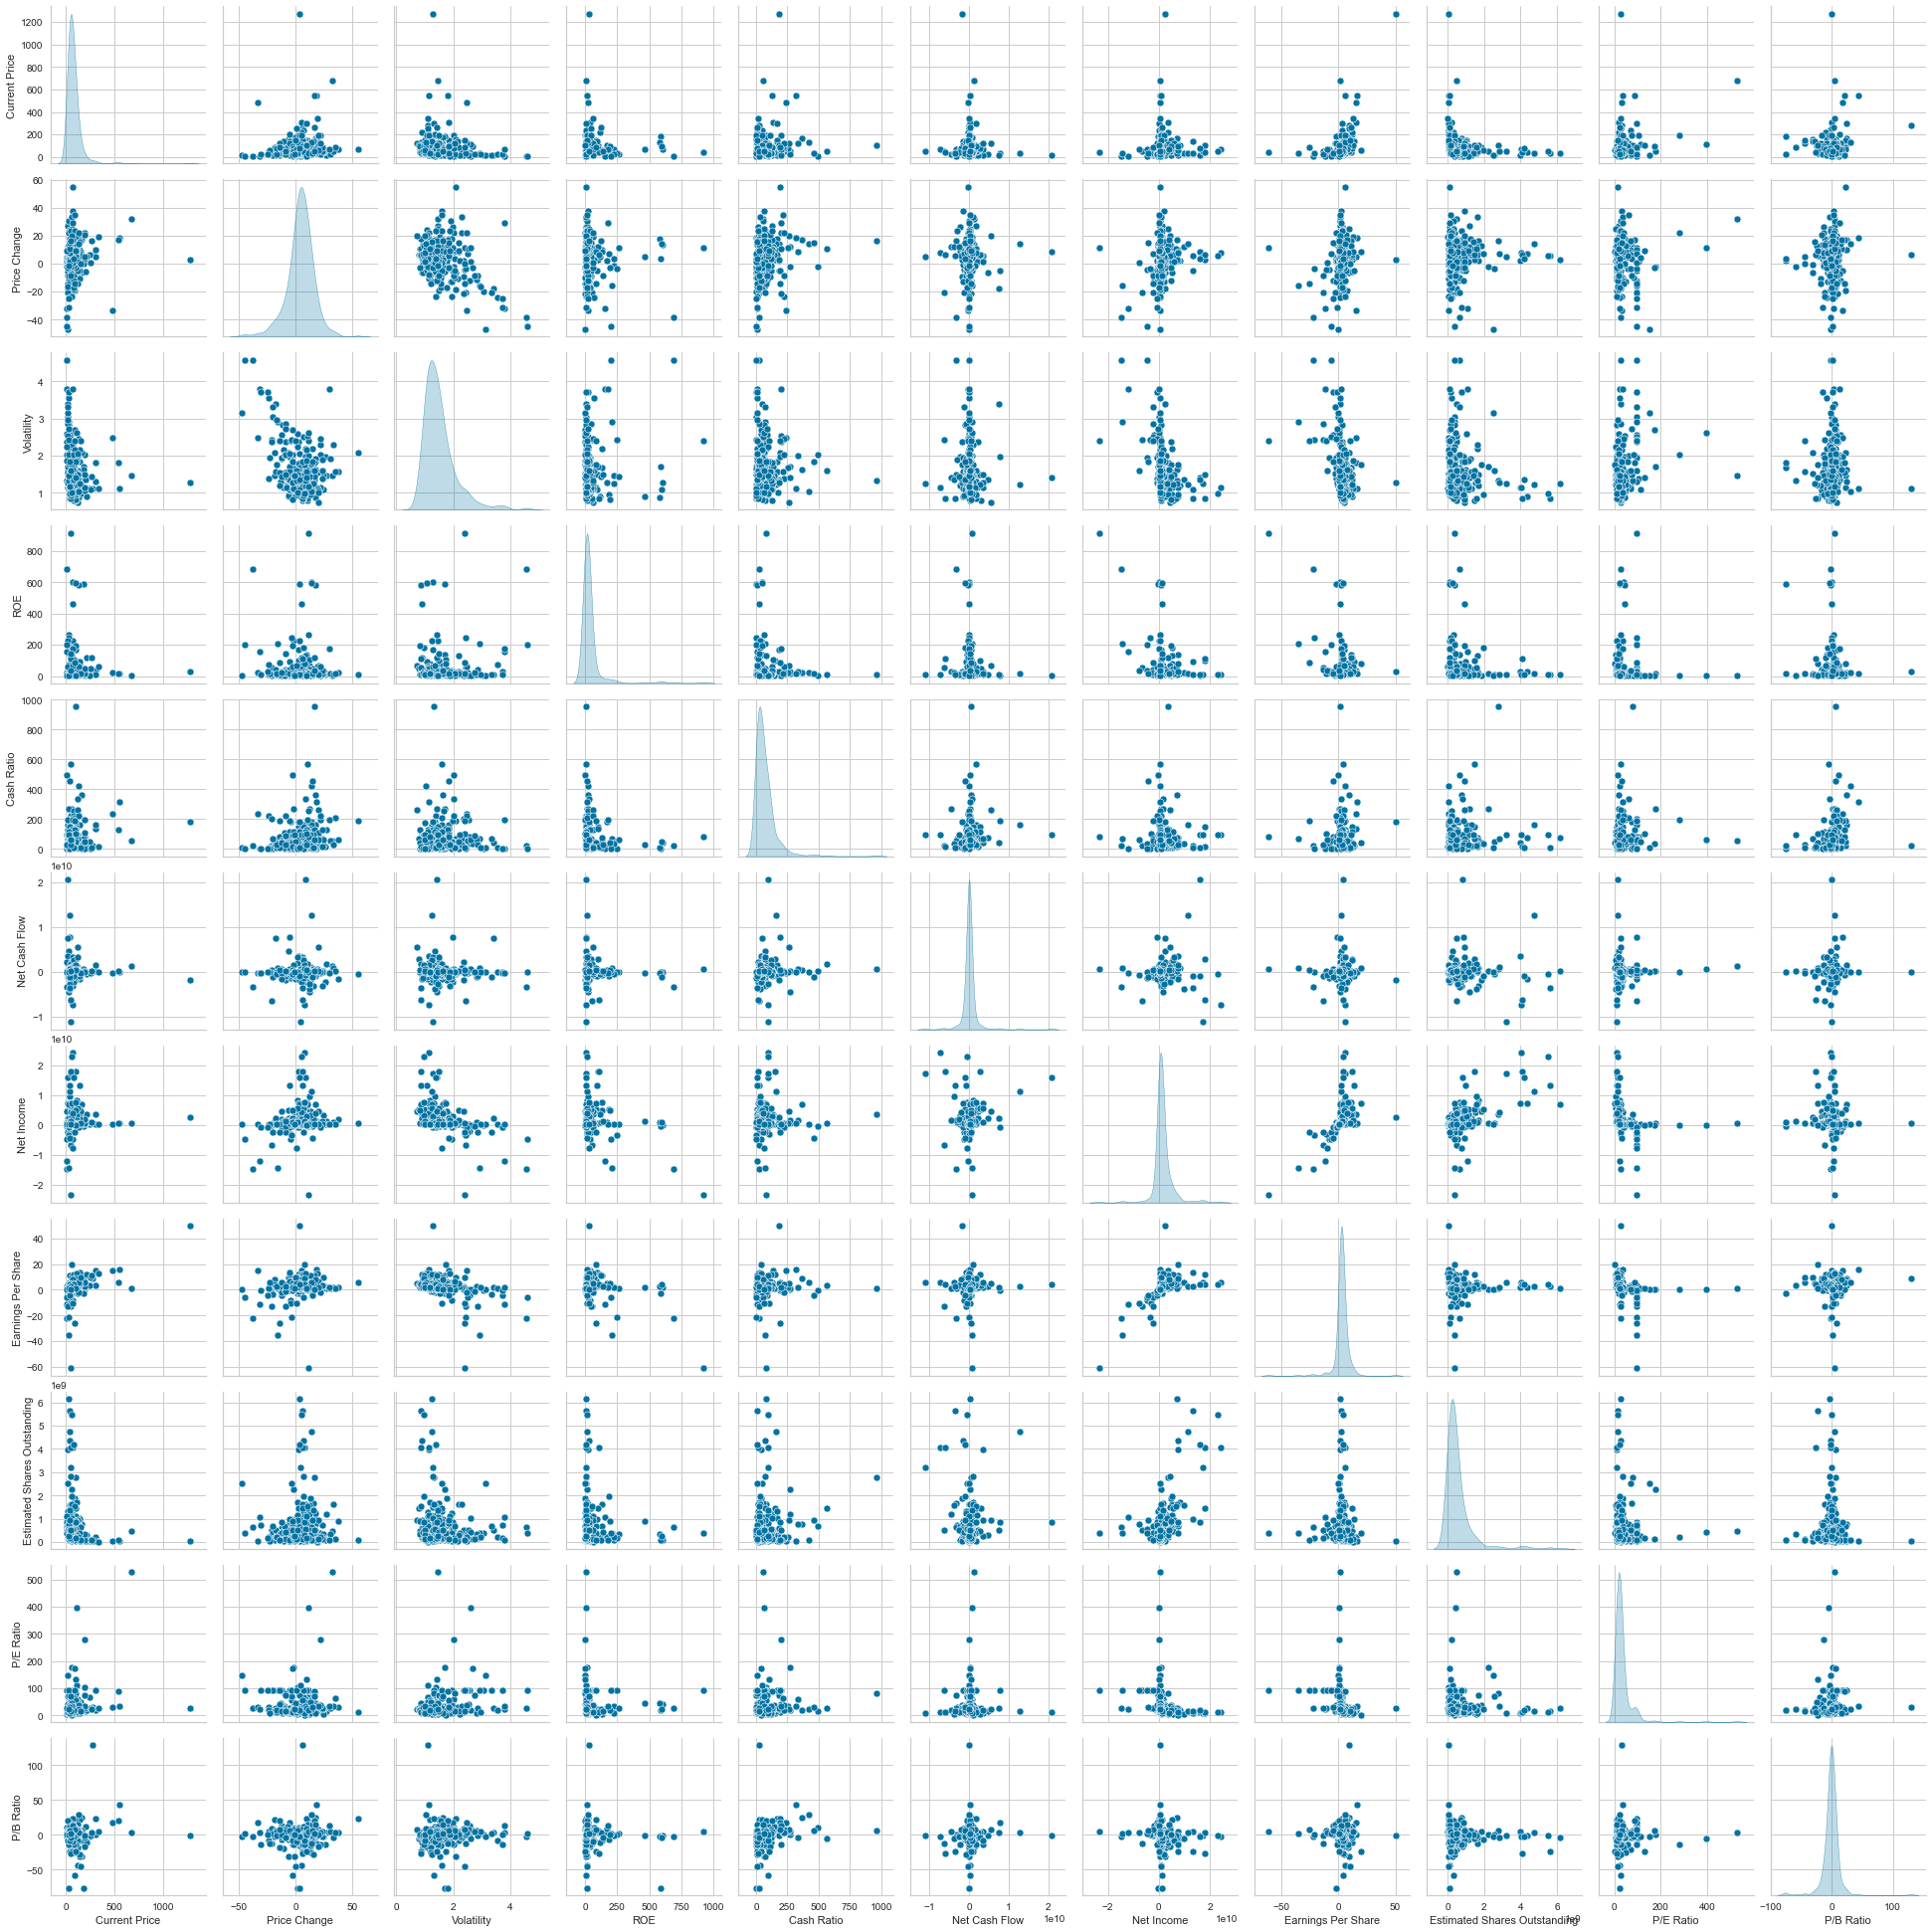

In [15]:
sns.pairplot(tah_df, diag_kind='kde')

### From the Pair Plot P/E Ratio appears to have multiple peaks suggesting multiple gaussians

1. What does the distribution of stock prices look like?

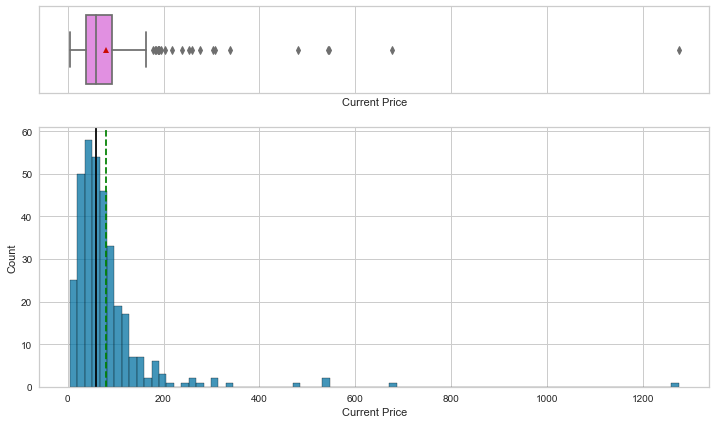

In [16]:
 histogram_boxplot(tah_df, "Current Price", figsize=(12, 7), kde=False, bins=None)   

### The stock price is rightly skewed and there are outliers.

2. The stocks of which economic sector have seen the maximum price increase on average?

In [17]:
data.groupby("GICS Sector")["Price Change"].mean("Price Change").sort_values(ascending=False).tail(10)

GICS Sector
Consumer Staples                8.684750
Information Technology          7.217476
Telecommunications Services     6.956980
Real Estate                     6.205548
Consumer Discretionary          5.846093
Materials                       5.589738
Financials                      3.865406
Industrials                     2.833127
Utilities                       0.803657
Energy                        -10.228289
Name: Price Change, dtype: float64

### Consumer Staples, Information Technology, Telecommunications Services, Real Estate, Consumer Discretionary, are the top five economic sectors in terms of stock price gains.

3. How are the different variables correlated with each other?

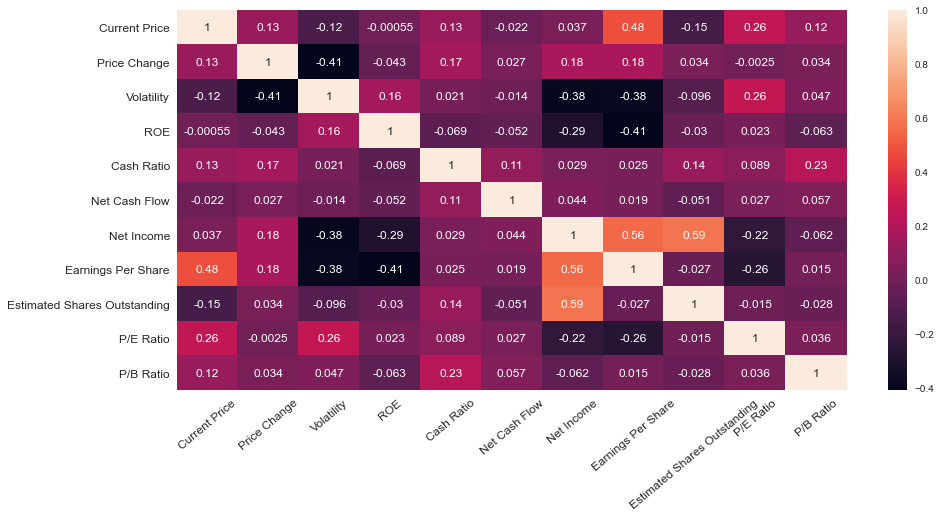

In [18]:
plt.figure(figsize=(15,7))
fg=sns.heatmap(tah_df.corr(), annot=True)

fg.set_yticklabels(fg.get_yticklabels(), fontsize=12)
fg.set_xticklabels(fg.get_xticklabels(), fontsize=12)
fg.set_xticklabels(fg.get_xticklabels(), rotation=40)
plt.show()

### There are a few features significantly correlated to each other:
* Estimated shares astounding and net income
* Earnings per share and net income

To a lesser degree:
* Current Price and Earnings per share
* Price change and volatility
* Earnings per share and ROE


4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?


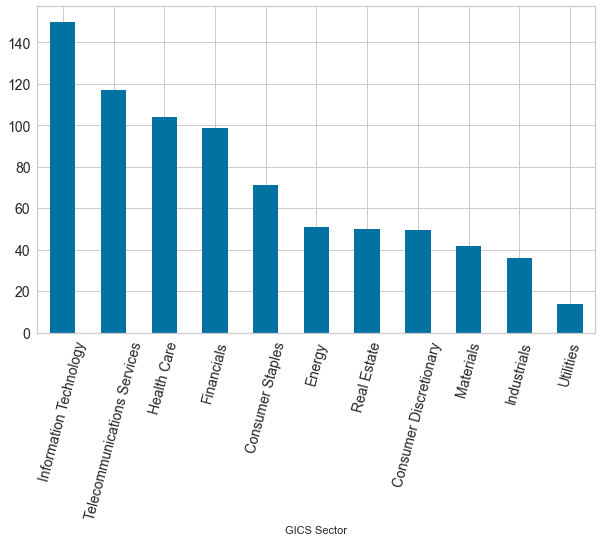

In [19]:
plt.figure(figsize=(10,6))
fg = data.groupby("GICS Sector")["Cash Ratio"].mean("Cash Ratio").sort_values(ascending=False).plot(kind='bar', fontsize=14)
fg.set_xticklabels(fg.get_xticklabels(), rotation=75)
plt.show()

5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

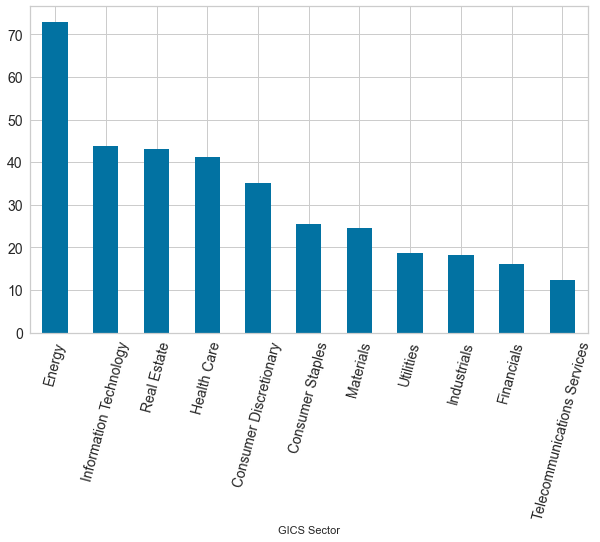

In [20]:
plt.figure(figsize=(10,6))
fg = data.groupby("GICS Sector")["P/E Ratio"].mean("P/E Ratio").sort_values(ascending=False).plot(kind='bar', fontsize=14)
fg.set_xticklabels(fg.get_xticklabels(), rotation=75)
plt.show()

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

In [21]:
# check if there are any duplicate rows and display them
# duplicated() return a Series object of booleans
# any() returns true if there is any True value in the Series
if (data.duplicated().any() == True):
    print("Duplicate Rows :")
    print(data[data.duplicated()])
else:
    print("There are no duplicated rows in the sample data set")

There are no duplicated rows in the sample data set


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

### There are no missing values in the data set

### The EDA revealed that there are signifant outliers in the sample data
* Outliers will be treated using KNN Nearest Neighbor algorithm 
 
    * The outliers will be identified using a user defined function that utilizes distance from the IQR 
    * The function replaces the outlier column values with NaNs
    * Finally, the NaNs are replaced using the KNN algorithm

Most of the dimensions have a normal distribution, therefore it is important to preserve that characteristic of the data
KNN is least likely to bias the data

In [23]:
# outlierToNan :replaces outliers with null values
# iqr is  equal to .75 percentile - .25 percentile
# return Series object where outliers have been changed to NaNs
def outlierToNan(df,col):  
    # to be more robust when called from custom transformer class
    q1 = df[col].quantile(0.25)  # 25th quantile
    q3 = df[col].quantile(0.75)  # 75th quantile  
    # calculate interquartile range iqr - difference btw third and first quartile
    iqr = q3 - q1
    # establish lower and upper limits of distribution
    lower_lim = q1 - 1.5 * iqr
    upper_lim = q3 + 1.5 * iqr   
    df[col] = df[col].apply(lambda x: np.NaN if((x < lower_lim) or (x > upper_lim)) else x)  
        
    return df

In [24]:
def remove_outliers_all(df, col_list):  
    for col in col_list:
        df = outlierToNan(df,col)
    return df

In [25]:
# replace outliers in the numeric data set with nulls
tah_df = remove_outliers_all(tah_df, tah_df.columns)

In [26]:
# load value imputer classes
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(missing_values=np.NaN, n_neighbors=5)

In [27]:
# fit and transform the data
tah_df[tah_df.columns] = imputer.fit_transform(tah_df[tah_df.columns])

## EDA to verify effect of outlier treatment

- It is a good idea to explore the data once again after manipulating it.

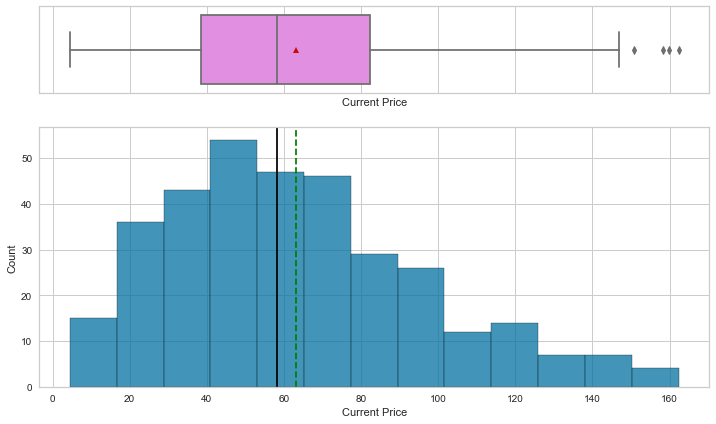

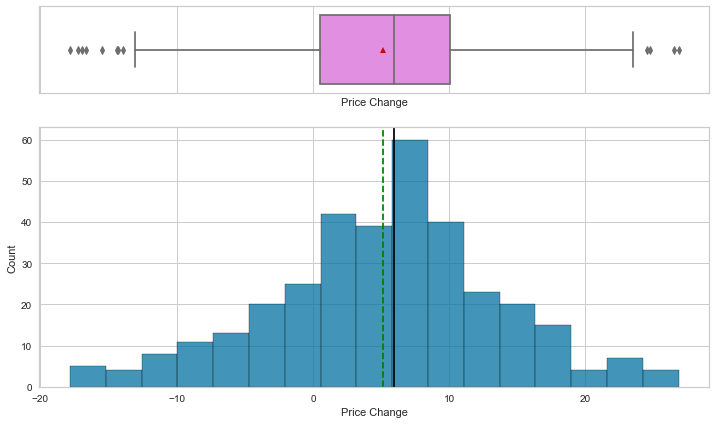

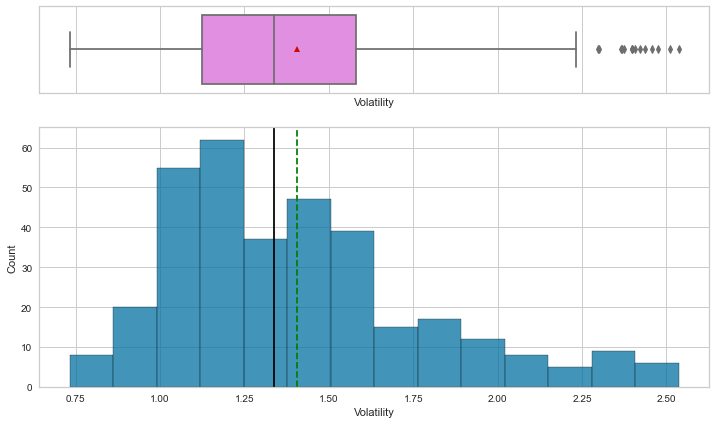

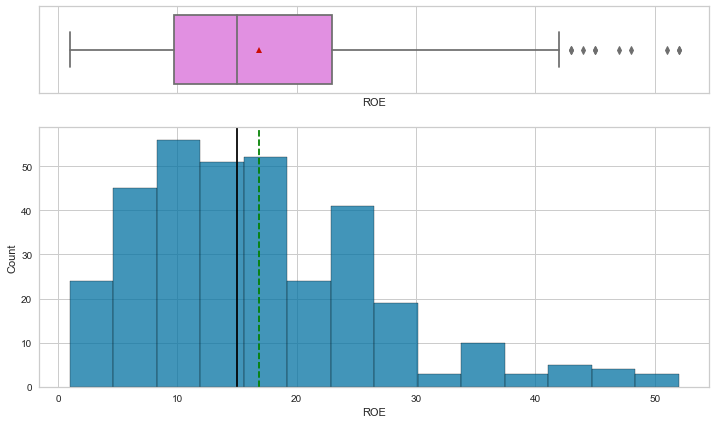

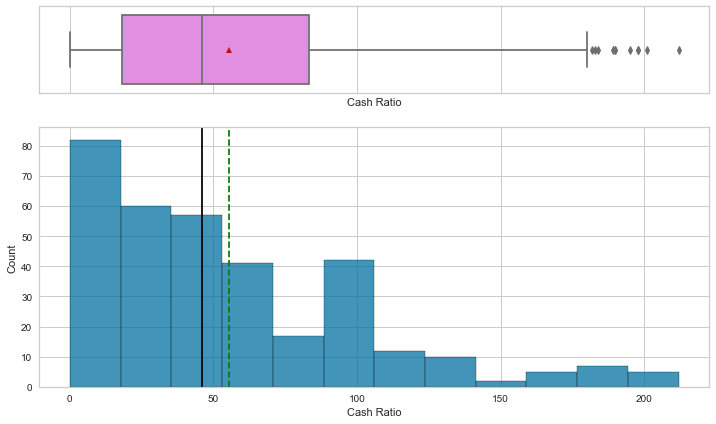

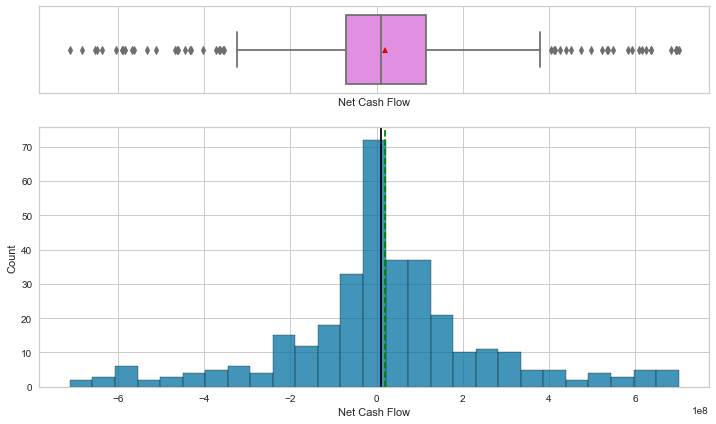

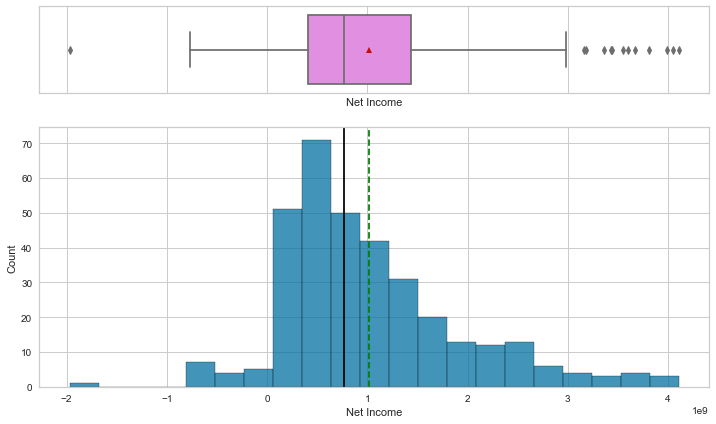

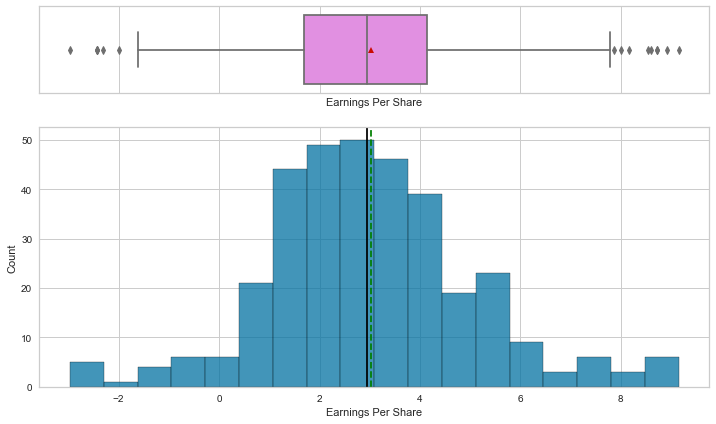

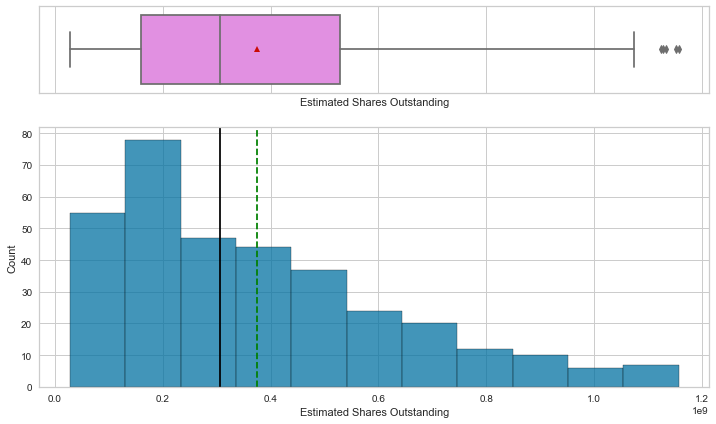

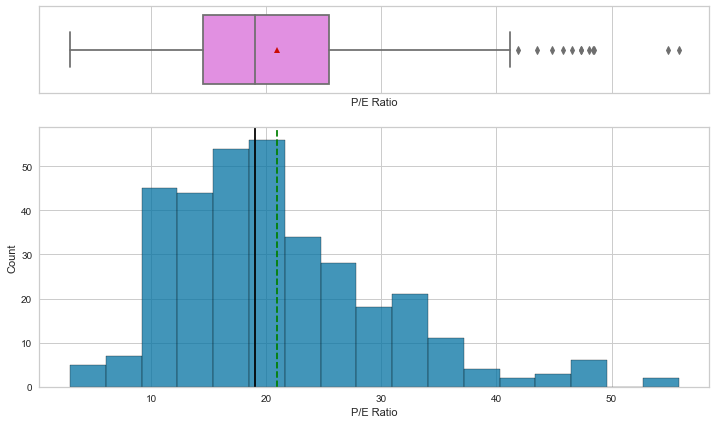

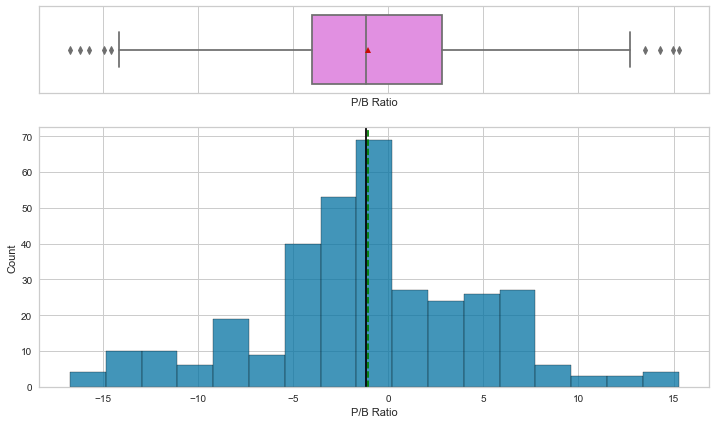

In [28]:
for feature in tah_df.columns:
    histogram_boxplot(tah_df, feature, figsize=(12, 7), kde=False, bins=None)    

### Outliers have been significantly eliminated

### Some columns will be dropped that are not contributing significantly to the clustering
* Volatility, which  is a measure of the standard deviation of the stock price over 13 weeks will be dropped because the variance accross the majority of observations is minimal. Price Change, a percentage of price changes over 13 weeks, on the other hand, has been significant. They are correlated, so Price Change alone is sufficient
* Estimated Shares Outstanding will be dropped because it is neither a critical indicator of stock performance, stability, nor yield. Moreover, it has a significant correlation with the Net Income, so it can be dropped.
* P/B Ratio is not as important a metric as P/E Ratio and can be dropped
* Net Cash Flow and Cash Ratio are essentially the same -- they measure reserves to liabilities and net cash inflows

In [29]:
tah_df.drop(['Volatility', 'Estimated Shares Outstanding', 'P/B Ratio', 'Net Cash Flow'], axis=1, inplace=True)

## K-means Clustering

In [30]:
# Normalize or scale data to avoid bias in a column weight in the distance computations
tah_nom_df=tah_df.apply(zscore)

In [31]:
tah_nom_df.head()

,Current Price,Price Change,ROE,Cash Ratio,Net Income,Earnings Per Share,P/E Ratio
0,-0.626013,0.580285,0.236254,-0.097863,0.184452,0.126227,-1.892011
1,-0.117918,0.381840,-0.280059,0.458048,0.889078,0.065320,-0.237404
2,-0.549001,0.735775,0.414978,0.244236,1.543309,-0.037828,-0.624605
3,0.925946,1.055579,-0.776514,2.660309,-0.432744,-0.863017,-0.624443
4,-0.235842,-0.833200,-0.280059,0.278446,-0.357590,-1.329641,-0.584839


### Split the data into clusters: but first 

* Determine the optimum number of clusters

In [32]:
%%time
# Find optimal number of clusters
# define range of k - cluster values to group
clusters=range(1,12)

# define array to store the computed variances
meanDistortions=[]

for k in clusters:
    # instantiate the Kmeans object  algorithm = "full",
    model=KMeans(n_clusters=k,  random_state=1)    
    # execute the Kmeans algorithm on the scaled data - tah_nom_df
    model.fit(tah_nom_df)
    # obtain the evaluated clusters for each observation (row) in the scaled data set
    prediction=model.predict(tah_nom_df)
    # some distance computation methods - euclidean jaccard mahalanobis chebyshev minkowski
    distortion = sum(np.min(cdist(tah_nom_df, model.cluster_centers_, 'euclidean'), axis=1)) / tah_nom_df.shape[0]
    meanDistortions.append(distortion)
    print("Number of clusters:", k, "\taverage distortion:", distortion)    

C:\Users\uchenna.Nwosu4J\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Number of clusters: 1 	average distortion: 2.5204225119484436
Number of clusters: 2 	average distortion: 2.2630341987512472
Number of clusters: 3 	average distortion: 2.120542064548869
Number of clusters: 4 	average distortion: 2.00248124706662
Number of clusters: 5 	average distortion: 1.9255373146710288
Number of clusters: 6 	average distortion: 1.8587704362797233
Number of clusters: 7 	average distortion: 1.8128957729617907
Number of clusters: 8 	average distortion: 1.7818753012027437
Number of clusters: 9 	average distortion: 1.7360951840664958
Number of clusters: 10 	average distortion: 1.7088983945853673
Number of clusters: 11 	average distortion: 1.6706919829453455
Wall time: 3.6 s


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

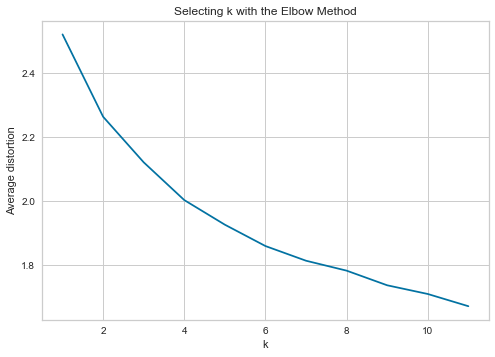

In [33]:
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

### The elbow appears to be at k = 6 clusters

### Obtain the silhouette coefficient in order to validate the chosen number of clusters from the elbow diagram

For n_clusters = 2, silhouette score is 0.1761126007146869
For n_clusters = 3, silhouette score is 0.1544212556659206
For n_clusters = 4, silhouette score is 0.16171176851285618
For n_clusters = 5, silhouette score is 0.16094193786015826
For n_clusters = 6, silhouette score is 0.16501986035312596
For n_clusters = 7, silhouette score is 0.15461559068166106
For n_clusters = 8, silhouette score is 0.1438700344307725
For n_clusters = 9, silhouette score is 0.1409582216771544
For n_clusters = 10, silhouette score is 0.1312546235370548
For n_clusters = 11, silhouette score is 0.151939792127761


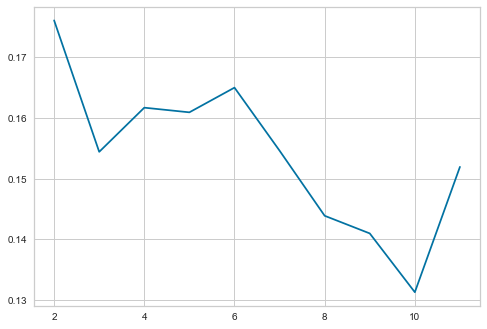

In [34]:
sil_score = []
cluster_list = list(range(2, 12))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((tah_nom_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(tah_nom_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

### The elbow appeared between the 6th and 8 clusters, therefore 6,7, or 8 clusters are viable possibilities for the number of clusters, however within that range the silhouette coefficient value is highest at 6 clusters.

In [35]:
# Let us try Kmeans with K = 6
Kmeans_final_model=KMeans(6, random_state=2)
Kmeans_final_model.fit(tah_nom_df)
prediction=Kmeans_final_model.predict(tah_nom_df)

# Append the cluster predictions to original data set
Kmeans_orig_data = data.copy()
# drop the same features that were eliminated in our scaled sample data
Kmeans_orig_data.drop(['Volatility', 'Estimated Shares Outstanding', 'P/B Ratio', 'Net Cash Flow'], axis=1, inplace=True)
Kmeans_orig_data["Group"] = prediction
tah_nom_df["Group"] = prediction

In [36]:
Kmeans_orig_data.sample(n=10)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,ROE,Cash Ratio,Net Income,Earnings Per Share,P/E Ratio,Group
37,AWK,American Water Works Company Inc,Utilities,Water Utilities,59.750000,8.596874,9,4,476000000,2.66,22.462406,2
28,ANTM,Anthem Inc.,Health Care,Managed Health Care,139.440002,-0.620053,11,70,2560000000,9.73,14.330935,5
230,NSC,Norfolk Southern Corp.,Industrials,Railroads,84.589996,9.529966,13,49,1556000000,5.13,16.489278,5
250,PHM,Pulte Homes Inc.,Consumer Discretionary,Homebuilding,17.820000,-5.564393,10,25,494090000,1.38,12.913043,4
256,PPL,PPL Corp.,Utilities,Electric Utilities,34.130001,3.424245,7,22,682000000,1.01,33.792080,2
56,CCI,Crown Castle International Corp.,Real Estate,REITs,86.449997,9.569068,21,36,1520992000,4.44,19.470720,5
15,ALB,Albemarle Corp,Materials,Specialty Chemicals,56.009998,26.461948,10,13,334906000,3.01,18.607973,2
26,AMZN,Amazon.com Inc,Consumer Discretionary,Internet & Direct Marketing Retail,675.890015,32.268105,4,58,596000000,1.28,528.039074,2
69,CME,CME Group Inc.,Financials,Financial Exchanges & Data,90.599998,-2.402245,6,99,1247000000,3.71,24.420485,1
92,DIS,The Walt Disney Company,Consumer Discretionary,Broadcasting & Cable TV,105.080002,2.049141,19,26,8382000000,4.95,21.228283,5


In [37]:
# inspect the distribution of row instances to cluster groups
Kmeans_orig_data.value_counts('Group')

Group
2    75
4    75
5    54
1    50
3    47
0    39
dtype: int64

### Obtain the average values of the dimensions inorder to build a profile

In [38]:
tah_clusters = Kmeans_orig_data.groupby(['Group'])
tah_clusters.mean()


,Current Price,Price Change,ROE,Cash Ratio,Net Income,Earnings Per Share,P/E Ratio
Group,,,,,,,
0,77.516056,0.173308,39.025641,38.307692,1.023824e+09,2.725897,26.003736
1,68.872200,8.347115,39.660000,138.560000,5.341664e+08,0.329400,35.939413
2,95.055071,9.398156,39.853333,61.893333,7.589775e+08,2.305333,50.656818
3,95.497807,6.443166,32.127660,100.042553,5.386171e+09,6.326702,15.747177
4,42.219384,-4.179873,44.093333,37.320000,1.355936e+08,0.070400,36.314188
5,115.601482,4.967983,39.851852,60.055556,2.244637e+09,6.402778,18.781711


## Preliminary Profile of the 6 clusters:

* Group 5 has high Current Price -- the highest currently priced stocks
* Group 4 has high Volatility -- the most volatile stocks; stocks in group 1 are most likely to depreciate in value
* Group 1 has high Cash Ratio -- they are stocks associated with companies with strong liquidity. They have sufficient cash reserves to meet their obligations
* Group 2 has high P/E Ratio -- they are stocks whose earnings are small in comparison to its price. 
* Group 3 has high Net Income
* Group 0 has very little Price Change or Volatility

### Comparing Kmeans with Spectral Clustering

In [39]:
%%time
# Find optimal number of clusters

# define range of k - cluster values to group
clusters=range(2,10)
s_scores = []

for k in clusters:
    # instantiate the Kmeans object 
    model=SpectralClustering(n_clusters=k, affinity='nearest_neighbors', random_state=1) 
    # execute the Spectral Clustering algorithm on the scaled data - tah_nom_df
    model.fit(tah_nom_df)
    # obtain the evaluated clusters for each observation (row) in the scaled data set
    prediction=model.labels_    
    # evaluate the performance
    s_scores.append(silhouette_score(tah_nom_df, prediction))
print(s_scores)

[0.24883659413268303, 0.21509650215048318, 0.24290583313912656, 0.2685310947584096, 0.2909136060054859, 0.26621733474216036, 0.2250024737836698, 0.1871008309358447]
Wall time: 1.4 s


In [40]:
model=SpectralClustering(n_clusters=6, affinity='nearest_neighbors', random_state=1) 
# execute the Spectral Clustering algorithm on the scaled data - tah_nom_df
model.fit(tah_nom_df)
prediction=model.labels_   
# evaluate the performance
print(silhouette_score(tah_nom_df, prediction))

0.2909136060054859


In [41]:
# Append the prediction to original data set
Kmeans_orig_data = data.copy()
# drop the same features that were eliminated in our scaled sample data
Kmeans_orig_data.drop(['Volatility', 'Estimated Shares Outstanding', 'P/B Ratio', 'Net Cash Flow'], axis=1, inplace=True)
Kmeans_orig_data["Group"] = prediction
Kmeans_orig_data["Group"] = prediction

In [42]:
Kmeans_orig_data.value_counts('Group')

Group
1    76
2    75
0    54
5    50
4    46
3    39
dtype: int64

In [43]:
tah_clusters = Kmeans_orig_data.groupby(['Group'])
tah_clusters.mean()

,Current Price,Price Change,ROE,Cash Ratio,Net Income,Earnings Per Share,P/E Ratio
Group,,,,,,,
0,115.601482,4.967983,39.851852,60.055556,2.244637e+09,6.402778,18.781711
1,42.221103,-3.993296,45.289474,37.500000,2.339411e+08,0.219342,35.885293
2,95.055071,9.398156,39.853333,61.893333,7.589775e+08,2.305333,50.656818
3,77.516056,0.173308,39.025641,38.307692,1.023824e+09,2.725897,26.003736
4,96.653195,6.365844,29.891304,101.108696,5.337827e+09,6.216630,16.008677
5,68.872200,8.347115,39.660000,138.560000,5.341664e+08,0.329400,35.939413


### The cluster sizes for 6 clusters in both the Kmeans and Spectral clustering are very similar

## Hierarchical Clustering

In [44]:
%%time
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(tah_nom_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(tah_nom_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.5301990080834796.
Cophenetic correlation for Euclidean distance and complete linkage is 0.571603324632798.
Cophenetic correlation for Euclidean distance and average linkage is 0.6565603054214663.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.6034923299524693.
Cophenetic correlation for Chebyshev distance and single linkage is 0.47956249283882246.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.40413477630562095.
Cophenetic correlation for Chebyshev distance and average linkage is 0.6600638386818614.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.5718825300213001.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.41279244593861997.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.2606731110277395.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.5655517476389385.
Cophenetic 

In [45]:
# print the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.6600638386818614, which is obtained with Chebyshev distance and average linkage.


### Let's explore different linkage methods with Euclidean distance only.

In [46]:
%%time
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(tah_nom_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(tah_nom_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.5301990080834796.
Cophenetic correlation for complete linkage is 0.571603324632798.
Cophenetic correlation for average linkage is 0.6565603054214663.
Cophenetic correlation for centroid linkage is 0.6662561158978351.
Cophenetic correlation for ward linkage is 0.5962453532499482.
Cophenetic correlation for weighted linkage is 0.6034923299524693.
Wall time: 86.6 ms


In [47]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.6662561158978351, which is obtained with centroid linkage.


### The cophenetic coefficient is maximum with Euclidean distance and centroid linkage. A value of 0.75 is significantly close to 1, which means the Dendrograms values are close to the Euclydian distance pairs of the features.

### Let's explore the dendrograms for the different linkage methods.

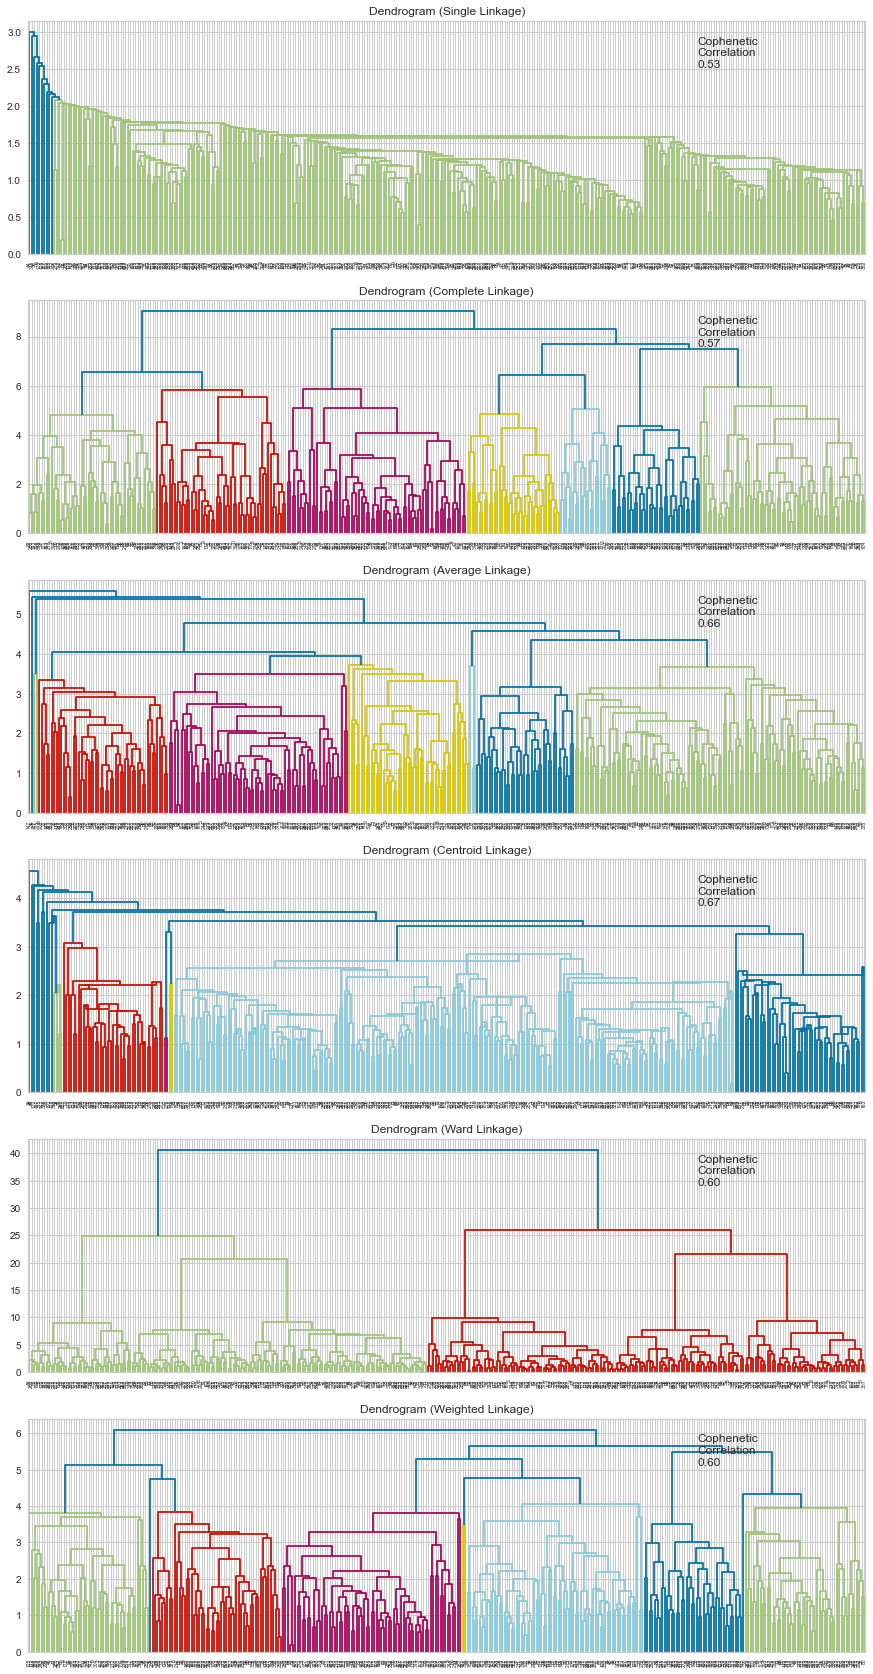

In [48]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(tah_nom_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(tah_nom_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

### Although the Dendrogram with Complete Linkage at 0.65, does not have the highest Cophenetic Correlation, it appears to be the most reliable because the cluster groupings are clearly demarcated.

In [49]:
%%time
hierarch_model = AgglomerativeClustering(n_clusters=6, affinity="euclidean", linkage="complete")
hierarch_model.fit(tah_nom_df)

Wall time: 9.39 ms


AgglomerativeClustering(linkage='complete', n_clusters=6)

In [50]:
clusters = 6

In [51]:
score = silhouette_score(tah_nom_df, hierarch_model.labels_)
print("For n_clusters = {}, silhouette score is {}".format(clusters, score))

For n_clusters = 6, silhouette score is 0.2611182678235292


In [52]:
Kmeans_orig_data.drop('Group', axis=1, inplace=True)

In [53]:
tah_nom_df["Group"] = hierarch_model.labels_
Kmeans_orig_data["Group"] = hierarch_model.labels_

In [54]:
Kmeans_orig_data.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,ROE,Cash Ratio,Net Income,Earnings Per Share,P/E Ratio,Group
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,135,51,7610000000,11.39,3.718174,3
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,130,77,5144000000,3.15,18.806350,3
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,21,67,4423000000,2.94,15.275510,3
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,9,180,629551000,1.26,74.555557,0
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,14,272,696878000,0.31,178.451613,2


In [55]:
Kmeans_orig_data.value_counts('Group')

Group
2    73
1    67
0    59
3    53
5    52
4    36
dtype: int64

### Cluster Profiling for Hierarchical Clustering


In [56]:
tah_clusters = Kmeans_orig_data.groupby(['Group'])
tah_clusters.mean()

,Current Price,Price Change,ROE,Cash Ratio,Net Income,Earnings Per Share,P/E Ratio
Group,,,,,,,
0,70.895932,10.131536,26.355932,116.542373,1.021037e+09,1.985254,33.690859
1,94.283885,8.861909,52.164179,72.238806,3.662574e+08,1.102687,54.498147
2,44.978957,-4.626067,43.821918,37.123288,-3.545366e+07,-0.240137,37.773852
3,92.602206,5.858478,31.547170,94.566038,5.057190e+09,6.266887,15.661451
4,78.921838,-1.082041,39.611111,37.111111,1.064161e+09,2.773889,24.925360
5,114.629808,5.023739,40.692308,58.346154,2.299185e+09,6.511154,18.543729


### Preliminary Profile of the 6 clusters:
* Group 5 has high Current Price -- the highest currently priced stocks
* Group 2 has high Volatility -- the most volatile stocks; stocks in group 1 are most likely to depreciate in value
* Group 0 has high Cash Ratio -- they are stocks associated with companies with strong liquidity. They have sufficient cash reserves to meet their obligations
* Group 1 has high P/E Ratio -- they are stocks whose price outstrip their earnings. 
* Group 3 has high Net Income
* Group 4 has very little Price Change or Volatility

## K-means vs Hierarchical Clustering

### The hierarchical clustering has lesser execution time than the Kmeans Clustering
### The two clustering techniques are similar
### The hierarchical clustering silhouette score of 0.2611 is higher than the Kmeans clustering score of 0.1650. The spectral clustering yielded a better silhouette score value of 0.2909
### Kmeans has a group with 75 observations, to 73 observations of Hierarchical; Kmeans has a group with 53 observations, in comparison to 54 of Hierarchical; Kmeans has a group with 52, to 50 observations of  Hierarchical;  Kmeans has a group with 36 observations to 39 of Hierarchical.
### 6 clusters are the ideal number of clusters.
### The clustering results obtained in the spectral clustering is very similar to the Kmeans and Hierarchical in terms of the distribution of observations in cluster groups




## Actionable Insights and Recommendations

### The classification of stocks into groupings like High Current Price, High Volatility, High Cash Ratio, Low P/E is independent of the GICS Sector and the GICS Sub Industry: therefore stocks should only be grouped on the basis of their identity (Security and Ticker Symbol)

### When creating a portfolio of stocks for investors, brokerages should advise prospective buyers on the basis of  insights like Volatility, Cash Ratio, P/E etc.

### Stocks in group 3 are premium investments because they have a low P/E Ratio, which means that earnings are outstripping the price of ther security. In addition, they are ranked second in Cash Ratio, this means the stocks are offerings of companies with solvency. Lastly they are not volatile stocks with high risk.

### Stocks in group 2 are the most underperforming investments and are equally highly volatile.


